In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# load data
path = './data/air_data.csv'
data = pd.read_csv(path)

## Step 1：explore data

In [3]:
# data.head()
# data.describe()
# data.info()

## Step 2: data process

In [4]:
# 2.1 data clear
# drop records of null value of tickect
data.dropna(subset=['SUM_YR_1', 'SUM_YR_2'], axis=0, how='any', inplace=True)

# Only records where the fare is non-zero, or where the average discount rate is zero at the same time as the total number of kilometres flown, are retained.
index1 = data['SUM_YR_1'] != 0
index2 = data['SUM_YR_1'] != 0
index3 = (data['SEG_KM_SUM'] == 0) & (data['avg_discount'] == 0) 
data = data[index1 | index2 | index3]

In [5]:
# 2.2 data retrival
data = data[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]

In [6]:
# 2.3 attribute transformation
# data.info()
data['LOAD_TIME'] = pd.to_datetime(data['LOAD_TIME'])
data['FFP_DATE'] = pd.to_datetime(data['FFP_DATE'])
data['L'] = data['LOAD_TIME'] - data['FFP_DATE']

In [7]:
# rename columns' name
data.columns = ['_', '_', 'R', 'F', 'M', 'C', 'L']
data = data[['R', 'F', 'M', 'C', 'L']]

In [8]:
# normalization 
ata = data.astype({'R':'float', 'F':'float', 'M':'float', 'C':'float'})
data['R'] -= data['R'].mean()
data['F'] -= data['F'].mean()
data['M'] -= data['M'].mean()
data['C'] -= data['C'].mean()
data['L'] -= data['L'].mean()
data = data /data.std()

## Step 3: Build Model 

In [9]:
# build model
kmodel = KMeans(n_clusters=5, n_jobs=1)
kmodel.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Step 4: visiualize 

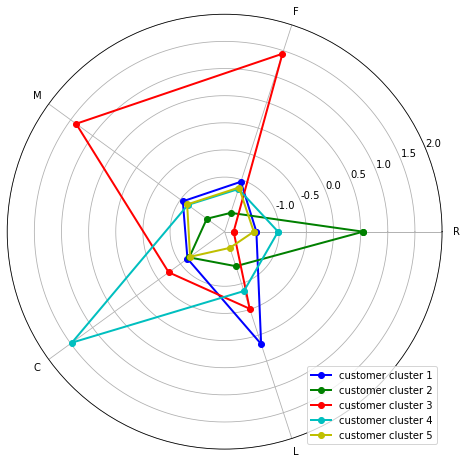

In [10]:
labels = data.columns 
k = 5 
plot_data = kmodel.cluster_centers_
color = ['b', 'g', 'r', 'c', 'y'] #指定颜色

angles = np.linspace(0, 2*np.pi, k, endpoint=False)

plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) # 闭合
angles = np.concatenate((angles, [angles[0]])) # 闭合

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True) #polar参数！！
for i in range(len(plot_data)):
  ax.plot(angles, plot_data[i], 'o-', color = color[i], label = f'customer cluster {i+1}', linewidth=2)# 画线

ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5))
ax.set_thetagrids(angles * 180/np.pi, labels)
plt.legend(loc = 4)
plt.show()


### 不同客户群特征表述表

| 群类别  |   优势特征    |  弱势特征  |   价值排名   |   排名含义   |  
|  ----   | ----        | ----     |   -----     |    ----     |
| 客户群1  | LMF        |         |     3      |  重要挽留客户  |
| 客户群2  |           |  FMR     |     5      |  低价值客户   |
| 客户群3  | LMR        |         |     1      |  重要保持客户  |
| 客户群4  | C          |  MFR     |     2      |  重要发展客户  |
| 客户群5  |           |  LC      |     4      |  一般客户    |


## 分析流程图
![分析流程图](analysis_flowchart.png)